In [1]:
import math


def distance(p, q):
    return math.sqrt(sum([(pi - qi)**2 for pi, qi in zip(p, q)]))


def single_link(ci, cj):
    return min([distance(vi, vj) for vi in ci for vj in cj])


def complete_link(ci, cj):
    return max([distance(vi, vj) for vi in ci for vj in cj])


def average_link(ci, cj):
    distances = [distance(vi, vj) for vi in ci for vj in cj]
    return sum(distances) / len(distances)


def get_distance_measure(M):
    if M == 0:
        return single_link
    elif M == 1:
        return complete_link
    else:
        return 

class AgglomerativeHierarchicalClustering:
    def __init__(self, data, K, M):
        self.data = data
        self.N = len(data)
        self.K = K
        self.measure = get_distance_measure(M)
        self.clusters = self.init_clusters()

    def init_clusters(self):
        return {data_id: [data_point] for data_id, data_point in enumerate(self.data)}

    def find_closest_clusters(self):
        min_dist = math.inf
        closest_clusters = None

        clusters_ids = list(self.clusters.keys())

        for i, cluster_i in enumerate(clusters_ids[:-1]):
            for j, cluster_j in enumerate(clusters_ids[i+1:]):
                dist = self.measure(self.clusters[cluster_i], self.clusters[cluster_j])
                if dist < min_dist:
                    min_dist, closest_clusters = dist, (cluster_i, cluster_j)
        return closest_clusters

    def merge_and_form_new_clusters(self, ci_id, cj_id):
        new_clusters = {0: self.clusters[ci_id] + self.clusters[cj_id]}

        for cluster_id in self.clusters.keys():
            if (cluster_id == ci_id) | (cluster_id == cj_id):
                continue
            new_clusters[len(new_clusters.keys())] = self.clusters[cluster_id]
        return new_clusters

    def run_algorithm(self):
        while len(self.clusters.keys()) > self.K:
            closest_clusters = self.find_closest_clusters()
            self.clusters = self.merge_and_form_new_clusters(*closest_clusters)

    def print(self):
        for id, points in self.clusters.items():
            print("Cluster: {}".format(id))
            for point in points:
                print("    {}".format(point))

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, cm
from matplotlib import colors
import patsy
from sklearn.metrics import pairwise_distances
from scipy.spatial import procrustes
from scipy.spatial import procrustes

d:\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
plt.rcParams["figure.figsize"] = [15.00, 7.50]
plt.rcParams["figure.autolayout"] = True

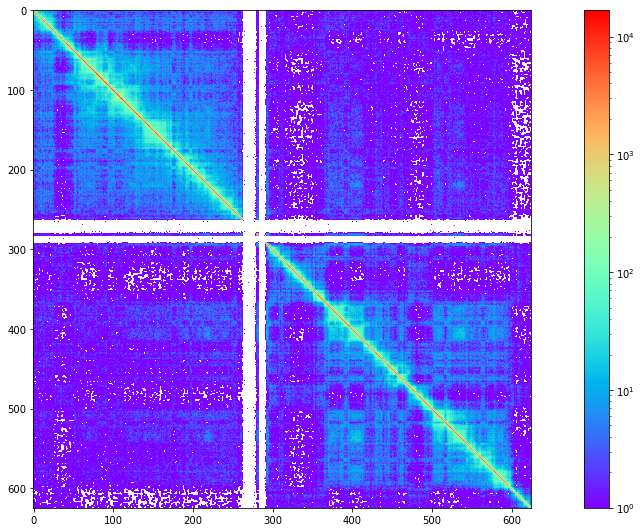

C shape (625, 625)


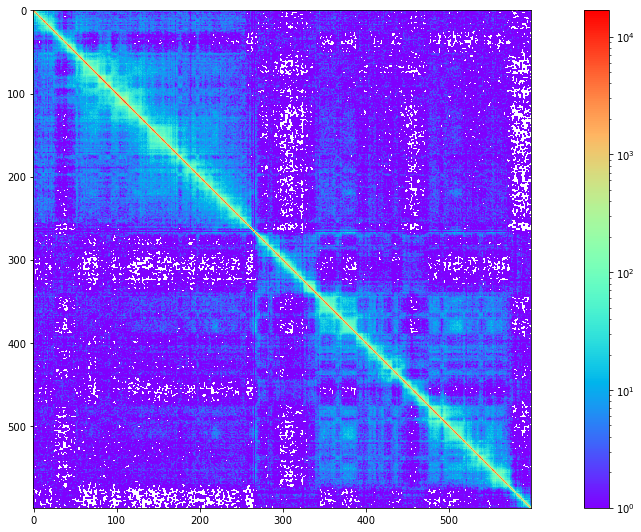

C shape (599, 599)


In [4]:
path = '..//data//IMR90_100kb_chr20.csv'
C = np.array(pd.read_csv(f'{path}', header=None))

im = plt.imshow(C, cmap=cm.rainbow, norm=colors.LogNorm())
plt.colorbar(im)
plt.show()

print('C shape', C.shape)


path = '..//data//C.csv'
C_test = np.array(pd.read_csv(path, header=None))
path = '..//data//H.csv'
H_test = np.array(pd.read_csv(path, header=None))
path = '..//data//Ho.csv'
Q_test = np.array(pd.read_csv(path, header=None))
path = '..//data//Z.csv'
Z_test = np.array(pd.read_csv(path, header=None))


mask = (C == 0).all(0)
# Find the indices of these columns
index = np.where(~mask)[0]
C = C[~mask,:]
C = C[:,~mask]


im = plt.imshow(C, cmap=cm.rainbow, norm=colors.LogNorm())
plt.colorbar(im)
plt.show()

print('C shape', C.shape)

In [22]:
import matplotlib.patches as patches

In [5]:
def merge_clusters(C, clusters, i1, i2):
    assert i2 - i1 == 1
    c1 = clusters[i1]
    c2 = clusters[i2]

    c1_left_x = c1[1][0]
    c1_left_y = c1[1][1]

    c2_right_x = c2[2][0]
    c2_right_y = c2[2][1]
    return [C[c1_left_x:c2_right_x+1, c1_left_y:c2_right_y+1], [c1_left_x,  c1_left_y], [c2_right_x, c2_right_y]]

array([ 4972,  6258,  3508,  3202,  5800,  3576,  3532,  3648,  3638,
        4484,  6264,  5950,  5196,  8140,  6546,  2818,  5618,  6800,
        4094,  5056,  5154,  4804,  5448,  5044,  6972,  4774,  4160,
        3978,  5550,  3566,  3382,  2828,  5584,  4712,  6206,  6126,
        2666,  2344,  4594,  4606,  3566,  4874,  7000,  6494,  7424,
        6310,  5582,  4336,  7312,  4476,  5706,  5914,  6450,  5862,
        5444,  5842,  5472,  7904,  7574,  6698,  6616,  7876,  7716,
        8956, 11958,  8520,  7532,  7830,  7298,  7092,  7454,  7360,
        7276,  6998,  6600,  7570,  7438,  9158,  8246, 13198, 12382,
       12064, 12352, 10300, 11056,  9932, 10874,  9486,  8862,  8000,
       11068, 10814, 10898,  8578,  7722,  7924,  7092,  5996,  8288,
       10290,  9706, 10638, 10758,  8712,  9564, 10142, 12170, 11050,
       11598, 11558, 12122, 11898, 11040,  9900,  9566,  7238,  8718,
        9734,  9068,  8036,  7830,  8074,  7014,  6156,  6912,  5608,
        5966,  6844,

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def measure(merged_clusters, c1, c2):
    return -(np.mean(merged_clusters[0]**2) - np.mean(c1[0]**2) - np.mean(c2[0]**2))
def get_cluster(u, u_t, C, clusters):
    if u < u_t:
        return clusters[u]
    if u == u_t:
        return merge_clusters(C, clusters, u, u+1)
    if u > u_t:
        return clusters[u+1]
def clusterize_C(C, depth, color_norm):
    C = C.copy()
    np.fill_diagonal(C, 0)
    t = 0
    clusters = []
    p = C.shape[0]
    if  t == 0:
        clusters = [[np.diag(C)[i], [i, i], [i, i]] for i in range(0, p)]
    i = 0
    for t in range(0, p):
        u_t = np.argmin([measure(
        merge_clusters(C, clusters, u, u+1),
        clusters[u],
        clusters[u+1]) for u in range(0, p - t - 1)])
        clusters = [get_cluster(u, u_t, C, clusters) for u in range(0, p-t-1)]
        if len(clusters) == depth:
            break
    
    fig, ax = plt.subplots()
    #ax.imshow(C, cmap=cm.rainbow, norm=colors.LogNorm())
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    im = ax.imshow(C, cmap=cm.rainbow)
    for cluster in clusters:
        rect = patches.Rectangle(cluster[1], cluster[2][0]-cluster[1][0], cluster[2][1]-cluster[1][0], linewidth=3, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    
    fig.colorbar(im, cax=cax, orientation='vertical')
    #plt.colorbar(im)
    plt.show()
    return clusters

C:\Users\user\AppData\Local\Temp\ipykernel_17032\1836956095.py:1: RuntimeWarning: divide by zero encountered in divide
  inverse_C = 1/C


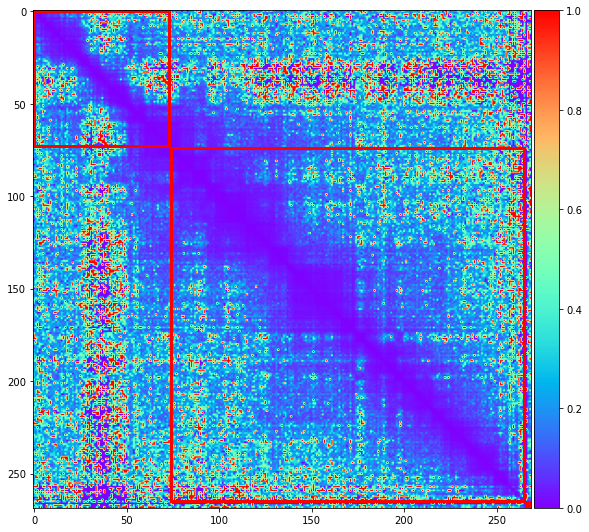

[[array([[0.        , 0.00574713, 0.01754386, ..., 0.33333333, 0.5       ,
          0.2       ],
         [0.00574713, 0.        , 0.008     , ..., 0.1       , 0.5       ,
          0.25      ],
         [0.01754386, 0.008     , 0.        , ..., 0.2       , 0.        ,
          0.25      ],
         ...,
         [0.33333333, 0.1       , 0.2       , ..., 0.        , 0.00502513,
          0.00990099],
         [0.5       , 0.5       , 0.        , ..., 0.00502513, 0.        ,
          0.00632911],
         [0.2       , 0.25      , 0.25      , ..., 0.00990099, 0.00632911,
          0.        ]]),
  [0, 0],
  [73, 73]],
 [array([[0.        , 0.0045045 , 0.0078125 , ..., 0.5       , 0.        ,
          1.        ],
         [0.0045045 , 0.        , 0.00510204, ..., 0.5       , 0.5       ,
          0.25      ],
         [0.0078125 , 0.00510204, 0.        , ..., 1.        , 1.        ,
          0.        ],
         ...,
         [0.5       , 0.5       , 1.        , ..., 0.        , 0.

In [62]:
inverse_C = 1/C
inverse_C[inverse_C == np.inf] = 0
clusterize_C(inverse_C[:269, :269], 
             depth =3, 
             color_norm=colors.Normalize(inverse_C.min(), inverse_C.max()))